<h1 style="text-align:center; font-size:45px">Suicide Rates In India EDA (2001-2012)</h1>

# About the Dataset:
<h3>Context</h3>

This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

<h3>Content</h3>

Time Period: 2001 - 2012 <br>
Granularity: Yearly <br>
Location: States and U.T's of India

<h3>Parameters</h3>

    a) Suicide causes
    b) Education status
    c) By means adopted
    d) Professional profile
    e) Social status

<h3>Acknowledgements</h3>

National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India. <br>
Source Link: (https://data.gov.in/search?title=Suicide)

# Importing necessary libraries: <a id=1 ></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Processing Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import boxcox

# Reading the dataset: <a id=2 ></a>

In [2]:
# Importing DataSet
df = pd.read_csv('/Users/yaswanth/LPU/LPU SEM 5/INT 353/Suicides_Data.csv')

# Display initial summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

                 State           Year Type_code                     Type  \
count           237519  237519.000000    237519                   237519   
unique              38            NaN         5                       69   
top     Madhya Pradesh            NaN    Causes  Others (Please Specify)   
freq              6792            NaN    109200                     7263   
mean               NaN    2006.500448       NaN                      NaN   
std                NaN       3.452240       NaN                      NaN   
min                NaN    2001.000000       NaN                      NaN   
25%                NaN    2004.000000       NaN                      NaN   
50%                NaN    2007.000000       NaN                      NaN   
75%                NaN    2010.000000       NaN                      NaN   
max                NaN    2012.000000       NaN                      NaN   

        Gender Age_group          Total  
count   237519    237519  237519.000000  
uni

In [3]:
print('Number of Rows: ' + str(df.shape[0]) + '\nNumber of Columns: ' + str(df.shape[1]))

Number of Rows: 237519
Number of Columns: 7


In [4]:
# Checking for NULL values
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [6]:
# Basic Analytics for Total Suicides
df['Total'].describe()

count    237519.000000
mean         55.034477
std         792.749038
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max       63343.000000
Name: Total, dtype: float64

# Data Pre-processing: <a id=3 ></a>

In [7]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [8]:
# Removing redundant values from 'States' Column:
df = df[(df['State'] != 'Total (All India)') 
        & (df['State'] != 'Total (States)') 
        & (df['State'] != 'Total (Uts)')]

In [9]:
df['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

# Exploratory Data Analysis: <a id=4 ></a>

In [10]:
df_causes = df[df['Type_code'] == 'Causes']

### Total number of people who has committed suicide from 2001 - 2012:

Suicides 2001 - 12:
        Total
Year        
2001  108506
2002  110417
2003  110851
2004  113697
2005  113914
2006  118112
2007  122637
2008  125017
2009  127151
2010  134599
2011  135585
2012  120488


<Axes: title={'center': 'Number of Suicides each Year From 2001 - 12'}, xlabel='Year', ylabel='Total Suicides'>

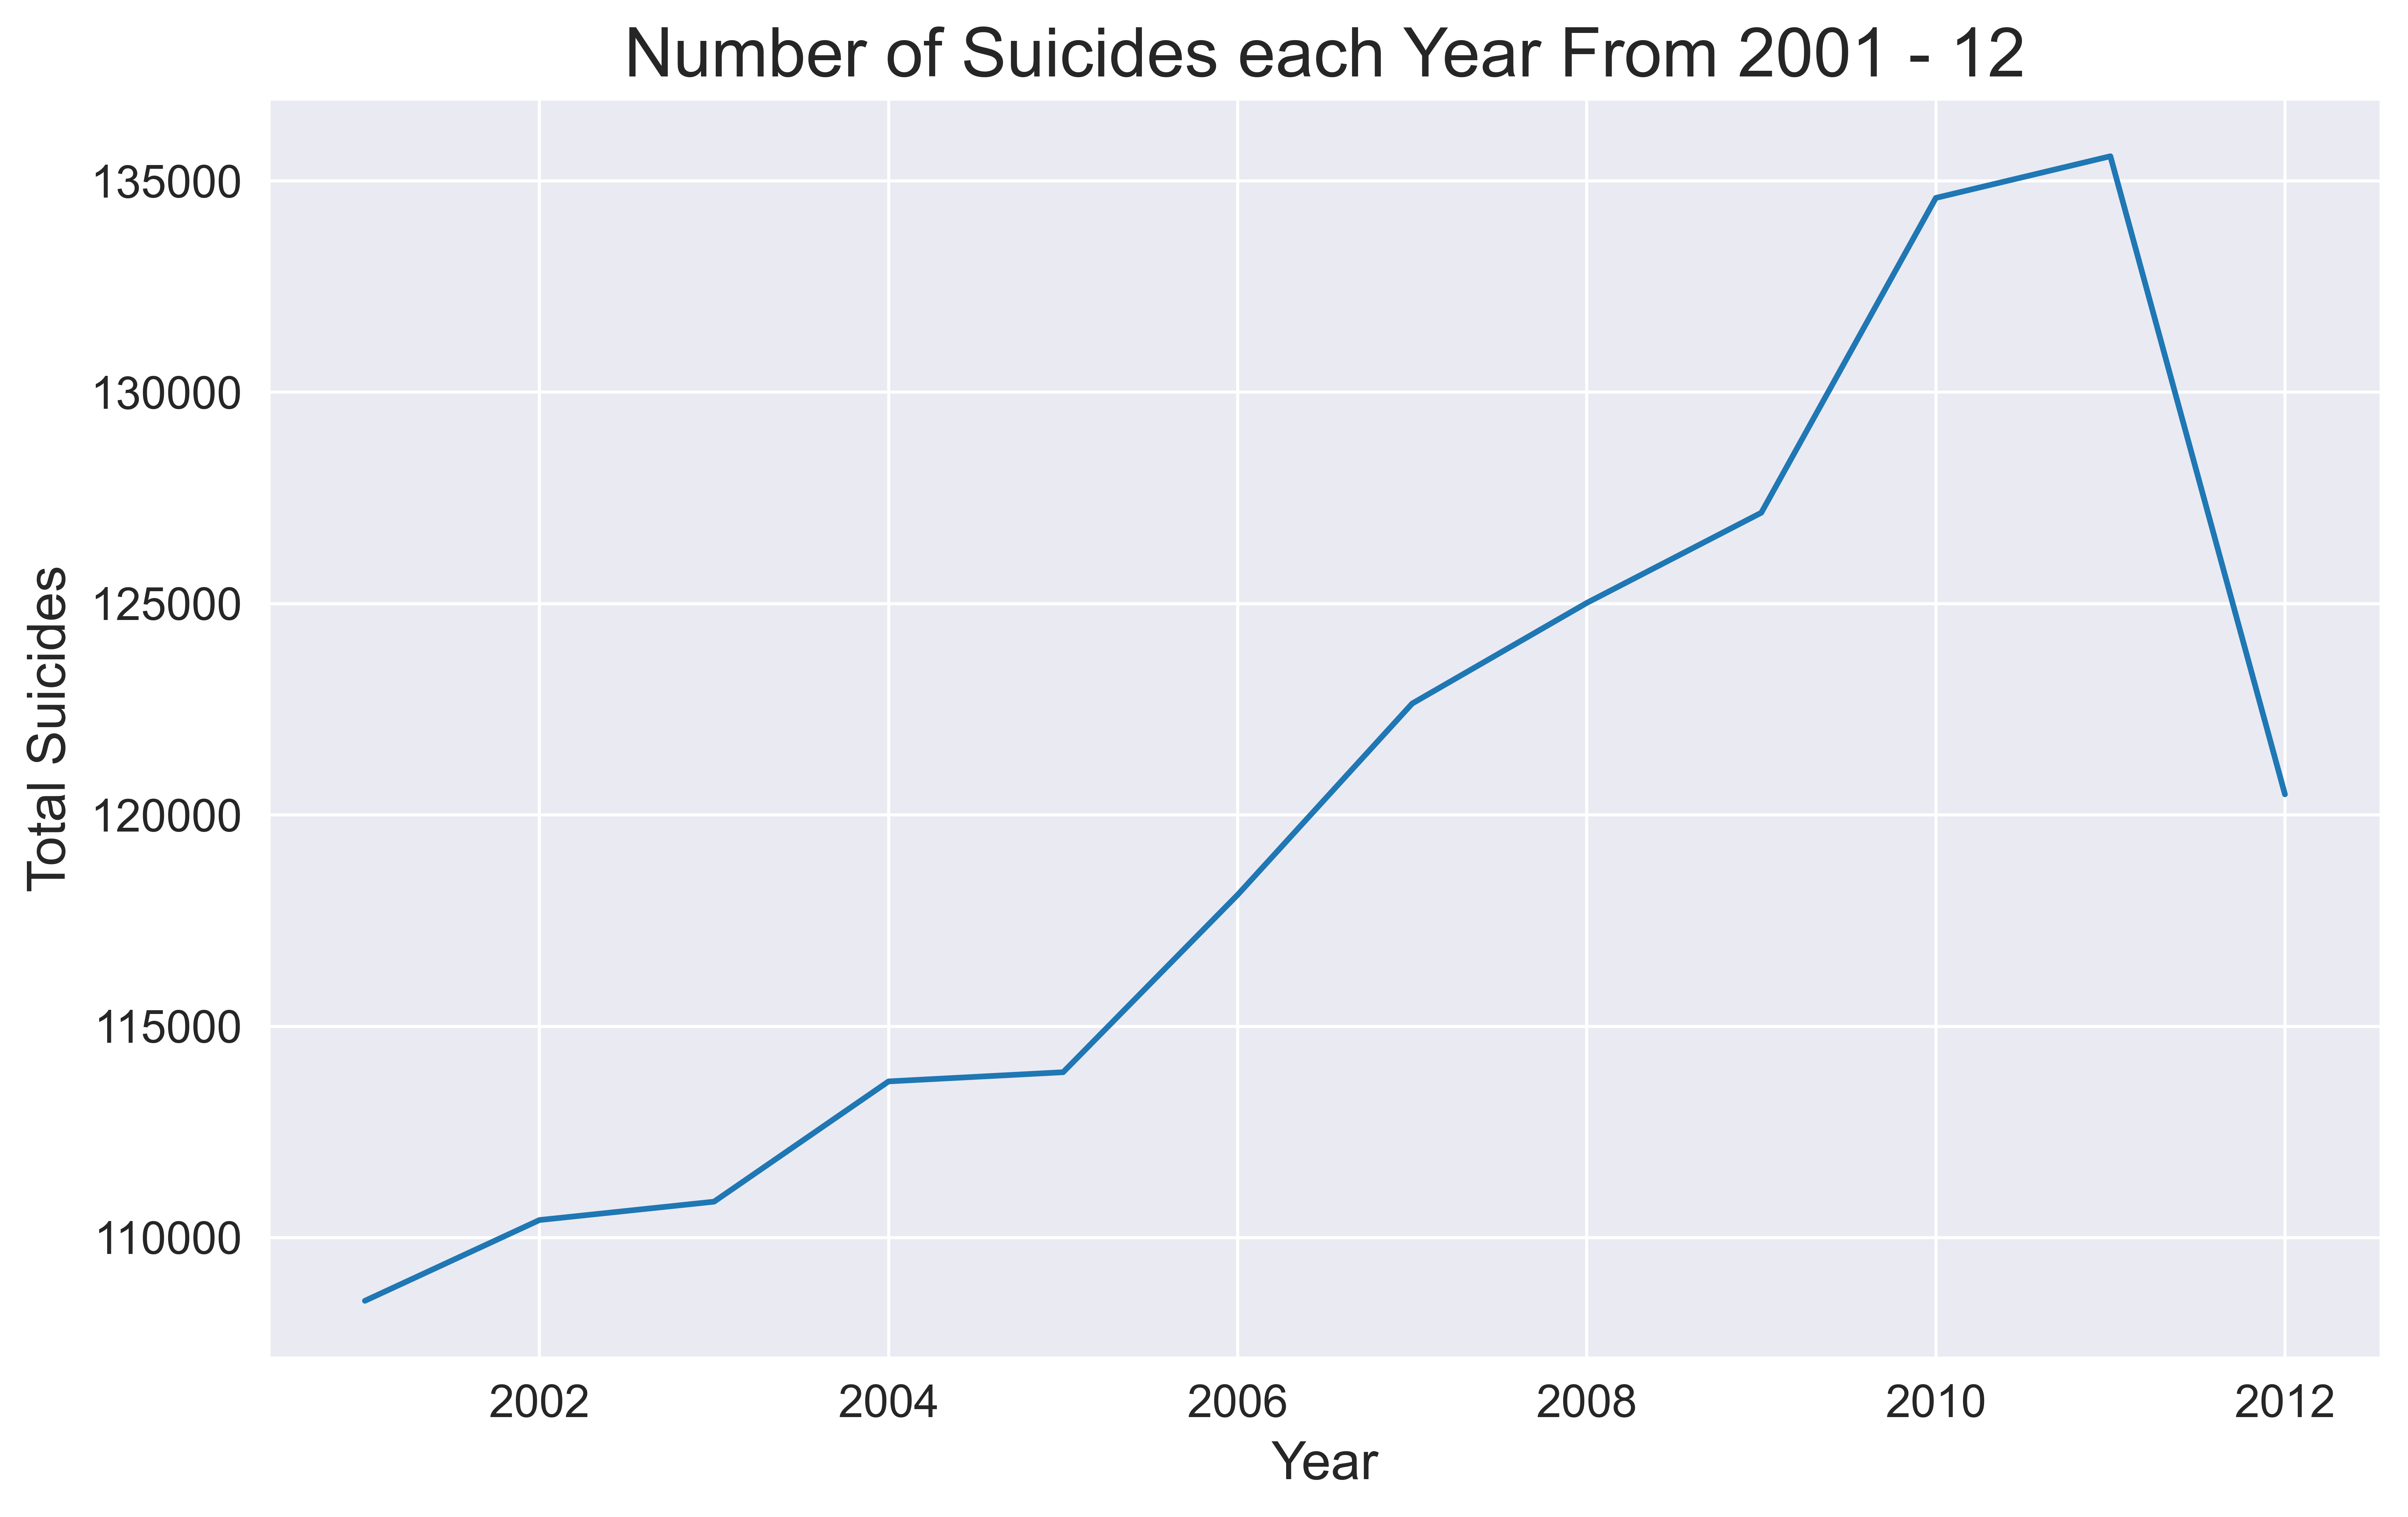

In [11]:
print('Suicides 2001 - 12:\n',df_causes.groupby('Year').sum())
tot_suicide = df_causes.groupby('Year').sum()
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,6), dpi=720)
plt.title("Number of Suicides each Year From 2001 - 12", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Total Suicides', fontsize=14)
plt.xlabel('Year', fontsize=14)
sns.lineplot(x='Year', y='Total', data=tot_suicide)

### Suicide Across States:

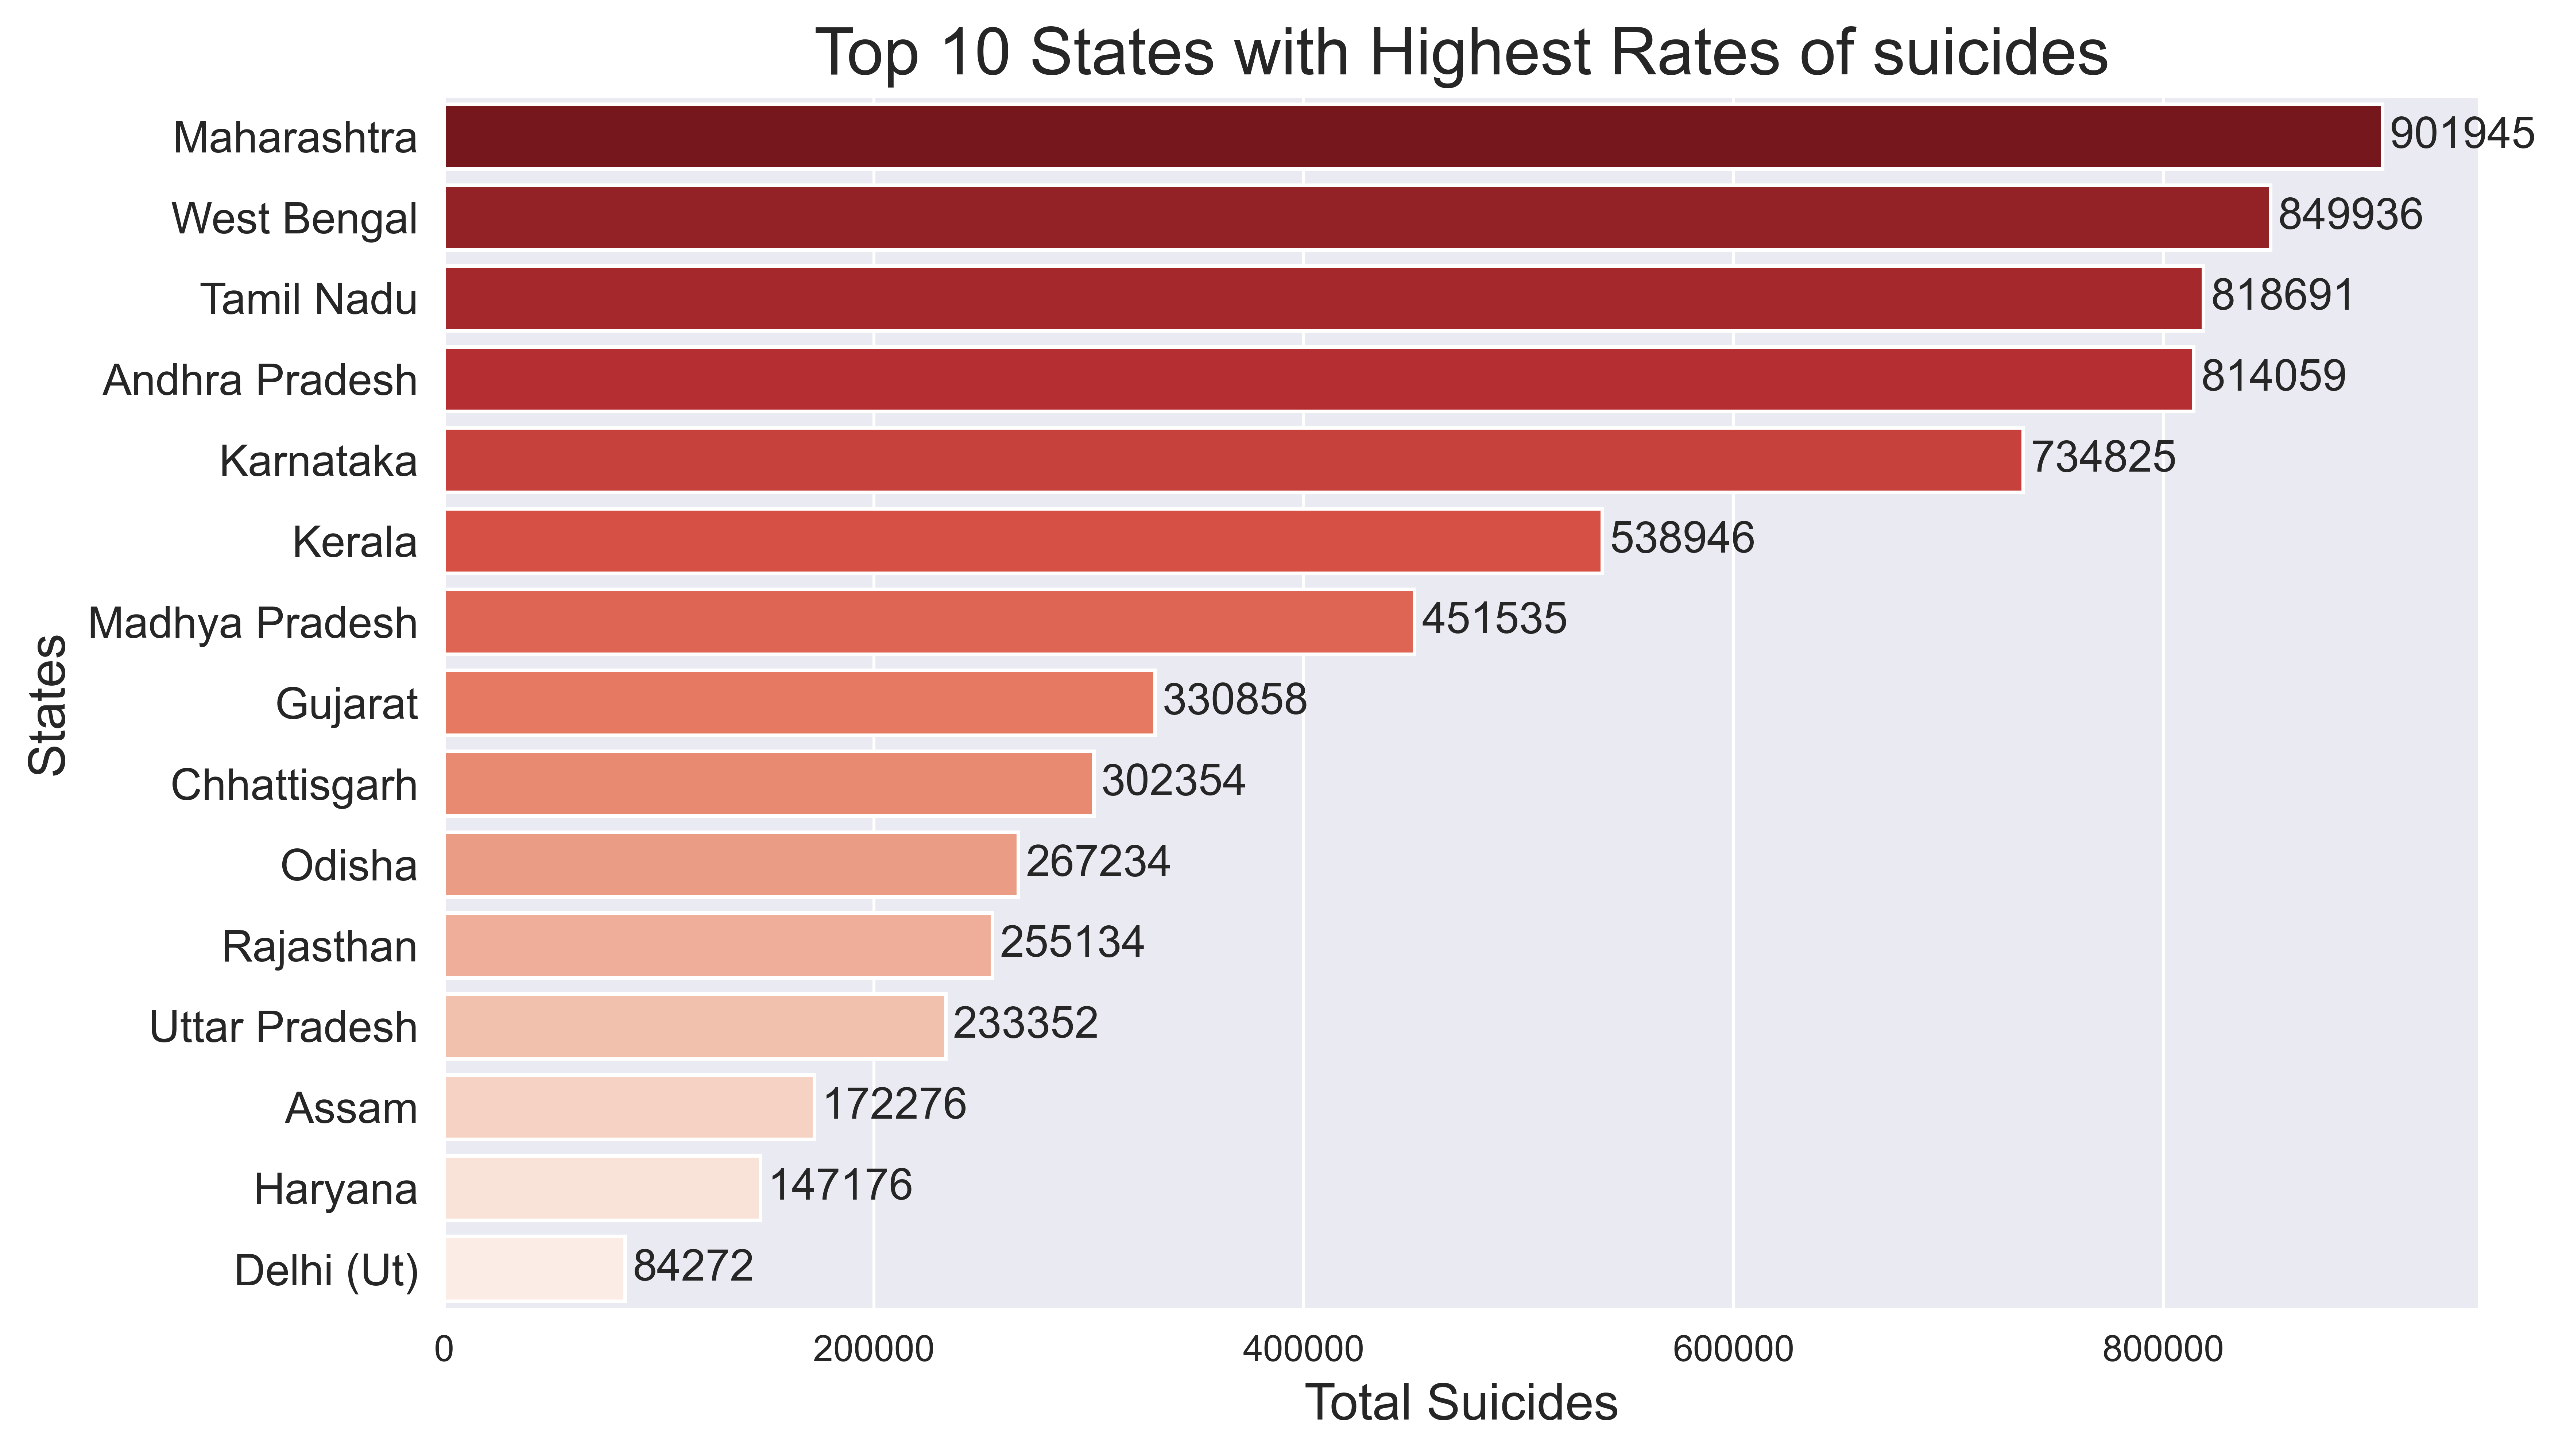

In [12]:
filter_state = df.groupby('State', as_index=False).sum()[['State','Total']].sort_values(by='Total', ascending=False).head(15)
plt.figure(figsize=(10,6), dpi=720)
c1 = sns.barplot(x='Total', y='State', data=filter_state, palette='Reds_r')
c1.bar_label(c1.containers[0], padding=2, size=12)
plt.title("Top 10 States with Highest Rates of suicides", fontsize=18)
plt.ylabel("States", fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("Total Suicides", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

### Gender which tends to commit more Suicides:

   Gender    Total
0  Female  2606922
1    Male  4641088


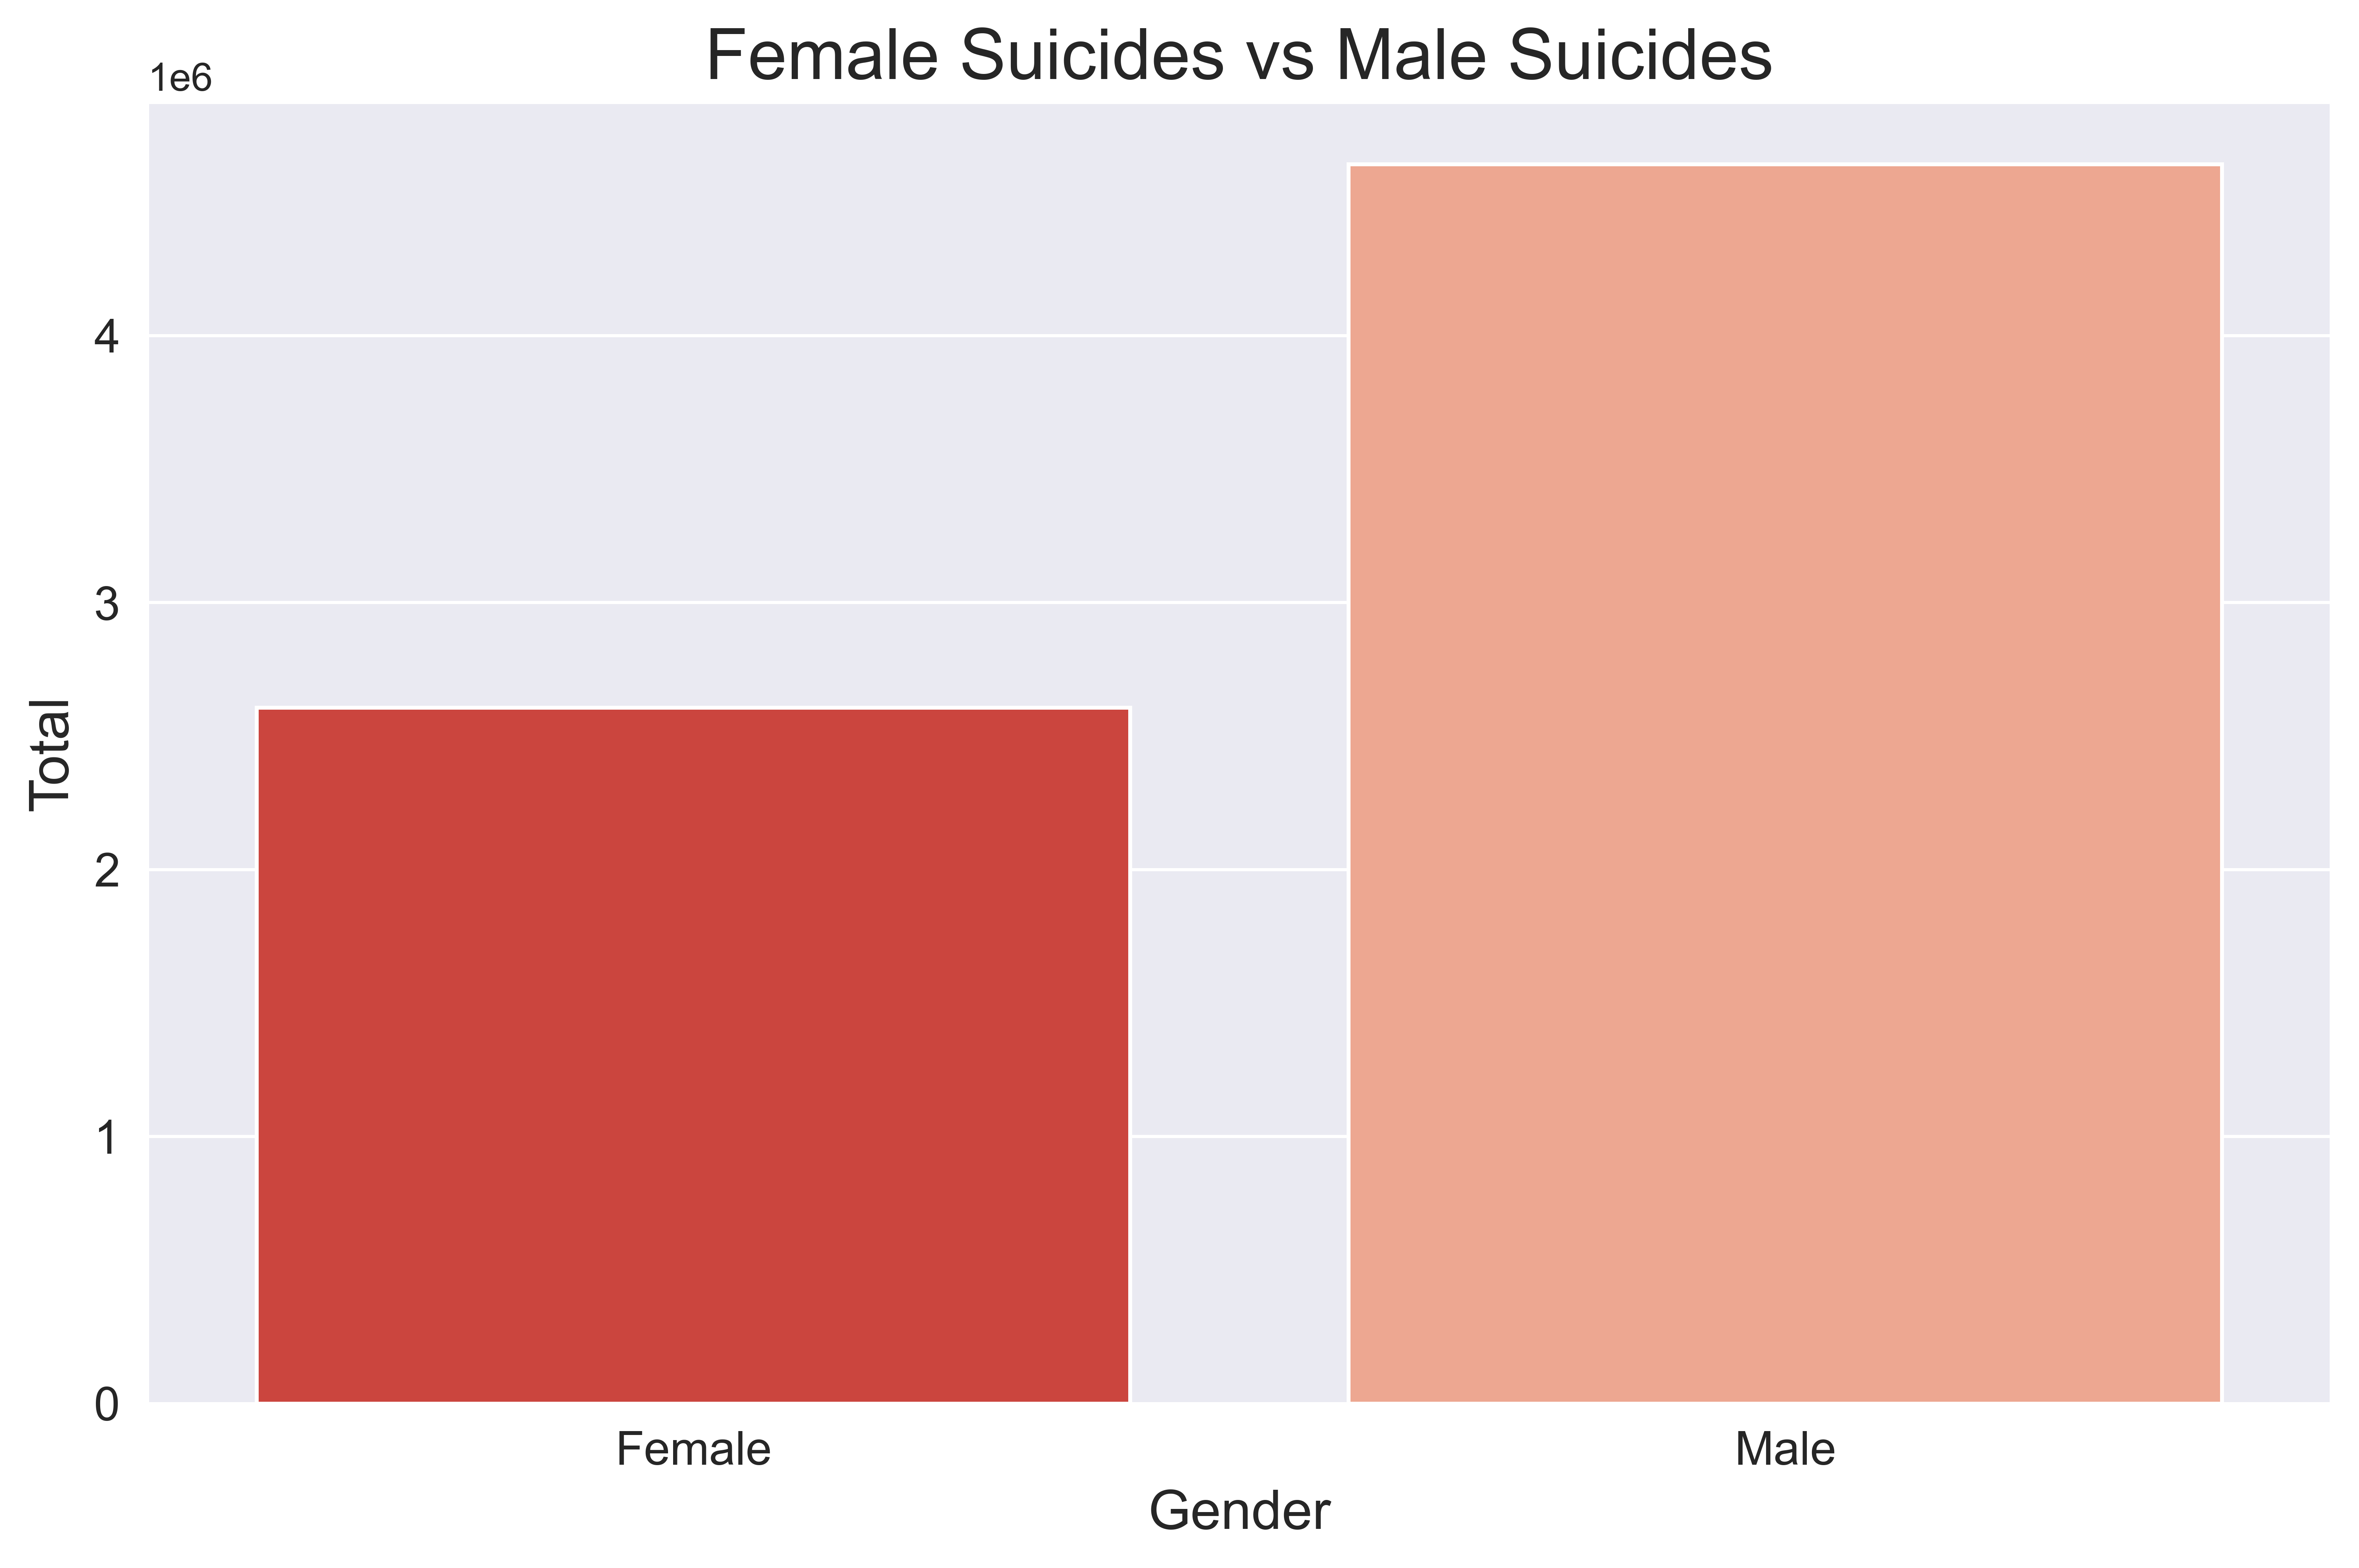

In [13]:
filter_gender = df.groupby('Gender', as_index=False).sum()[['Gender', 'Total']]
print(filter_gender)
plt.figure(figsize=(10,6), dpi=720)
c1 = sns.barplot(x='Gender', y='Total', data=filter_gender, palette='Reds_r')
plt.title("Female Suicides vs Male Suicides", fontsize=18)
plt.ylabel("Total", fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("Gender", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

### Gender-wise suicide in States:

In [14]:
state_gender = (df_causes.groupby(["State","Gender",'Year'])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
state_gender['Total']=state_gender.sum(axis=1, numeric_only=True)
state_gender.style.background_gradient(cmap='Reds')

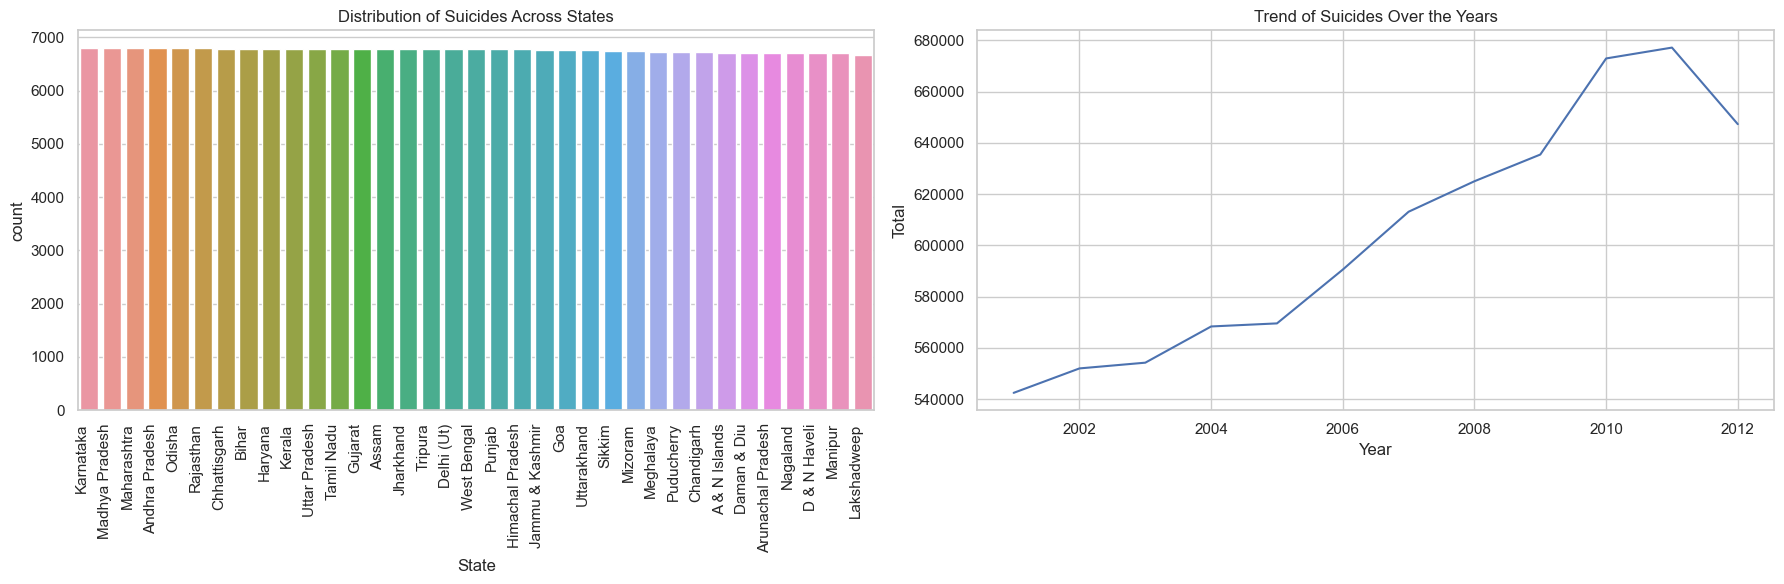

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Univariate Analysis: Visualizing the distribution of suicides across states
sns.countplot(x='State', data=df, order=df['State'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Suicides Across States')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Bivariate Analysis: Visualizing the trend of suicides over the years
sns.lineplot(x='Year', y='Total', data=df, estimator='sum', ci=None, ax=axes[1])
axes[1].set_title('Trend of Suicides Over the Years')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Cause of Suicides:

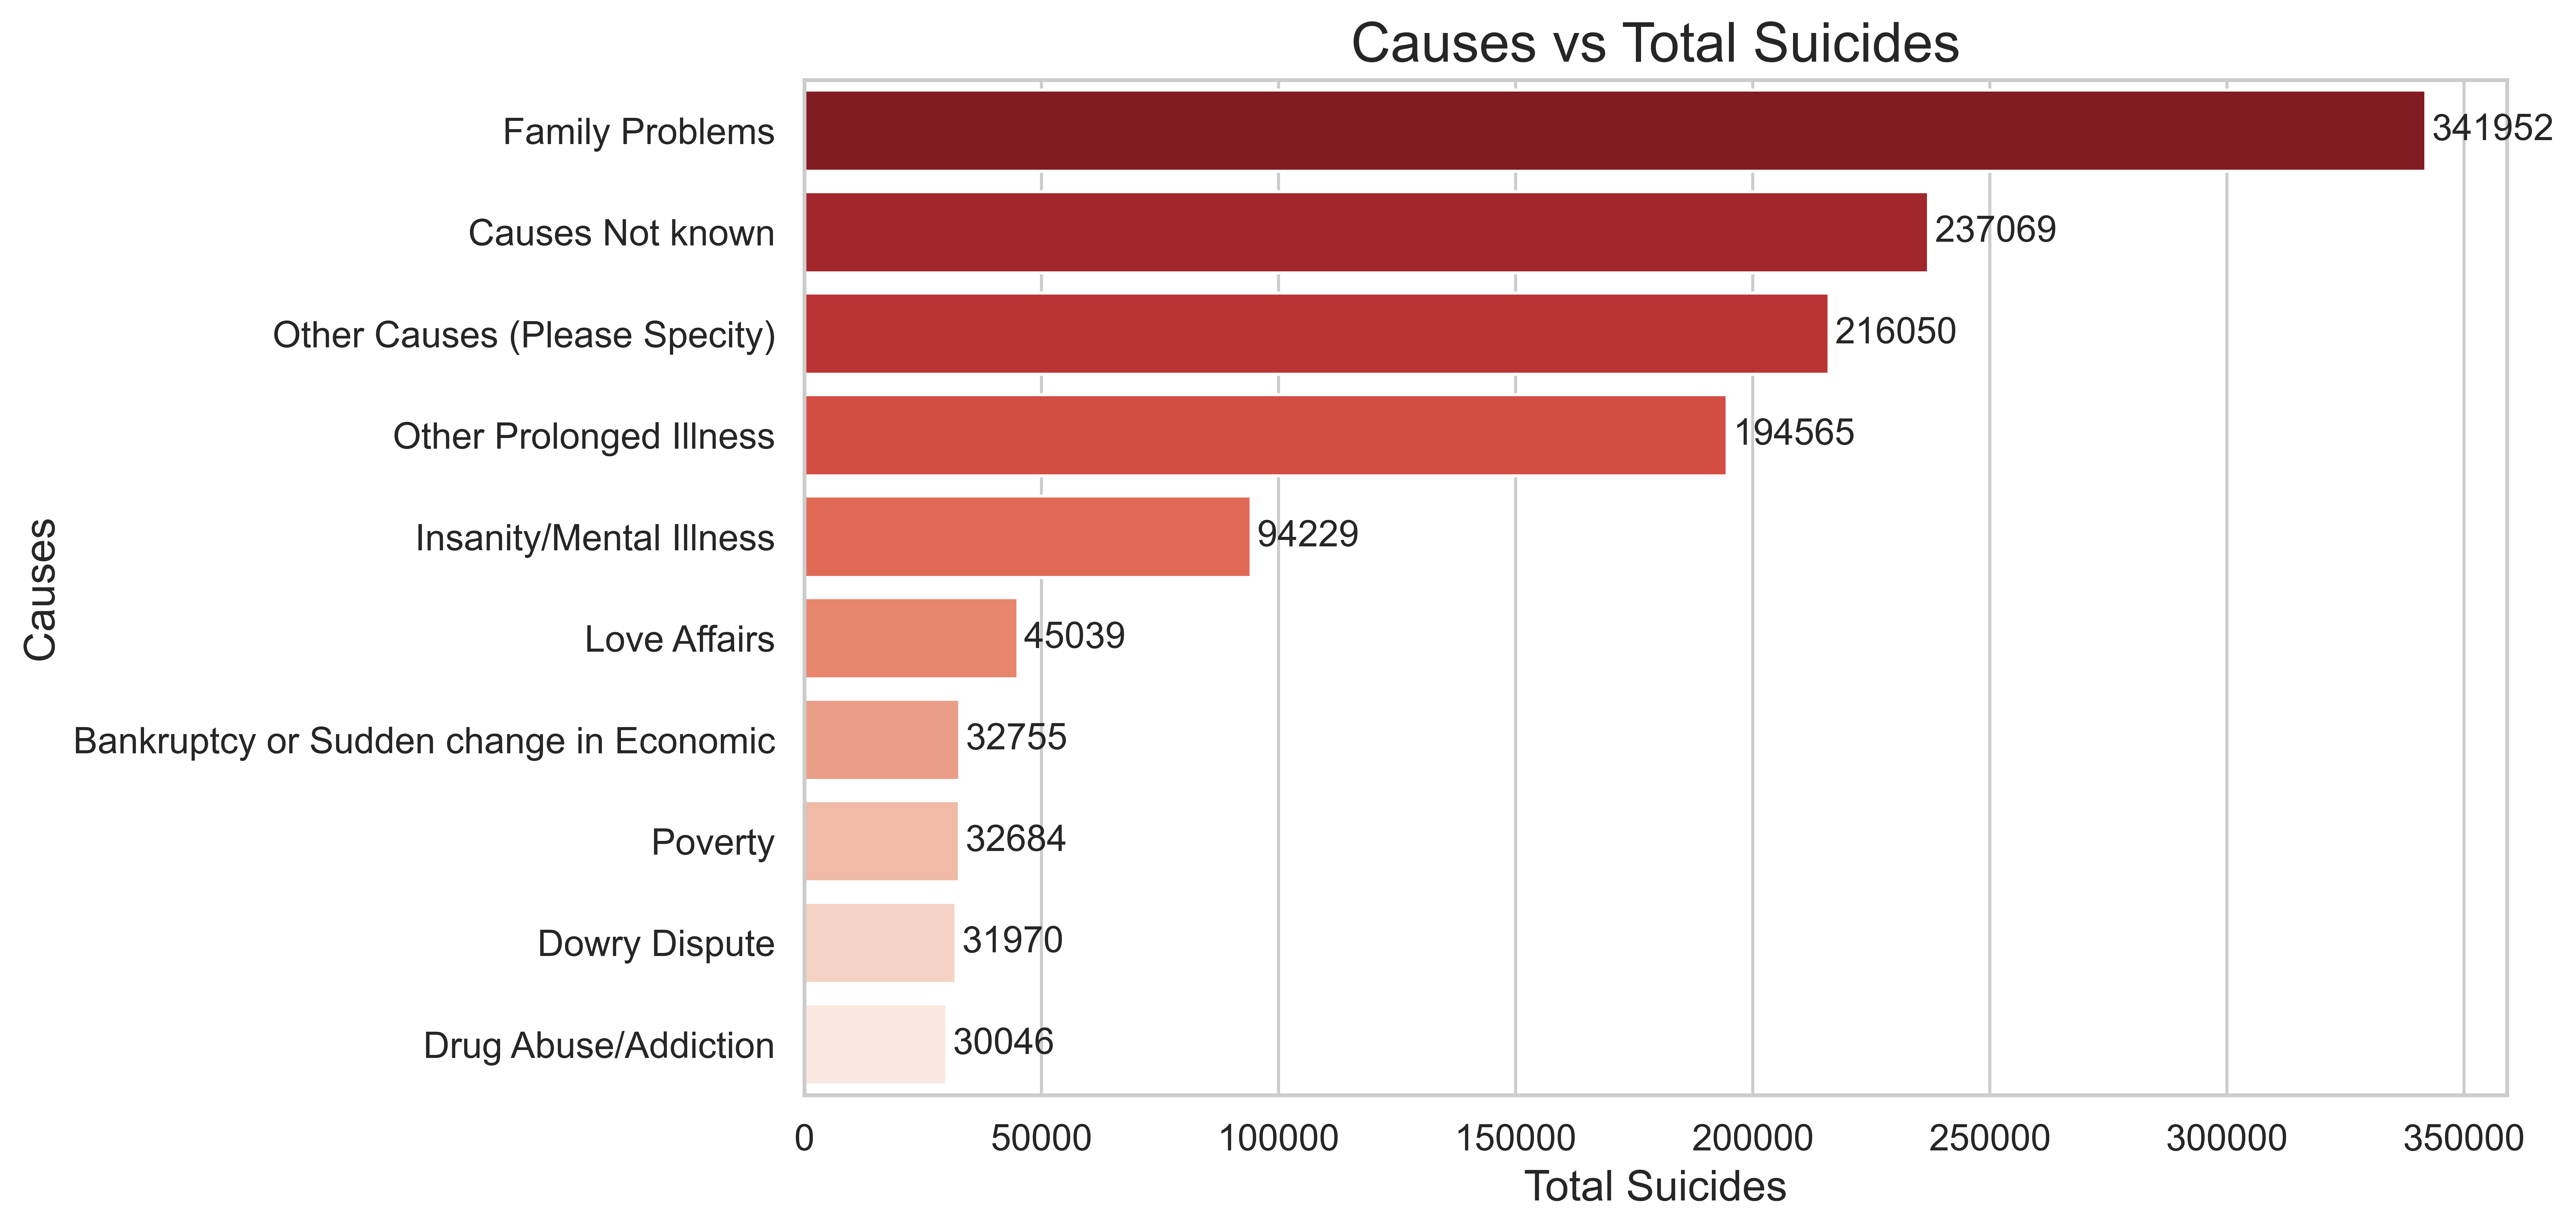

In [16]:
plt.figure(figsize=(10,6), dpi=720)
temp = df_causes[['Type', 'Total']].groupby('Type', as_index=False).sum().sort_values('Total', ascending=False).head(10)
c1 = sns.barplot(y=temp['Type'], x=temp['Total'], palette='Reds_r')
c1.bar_label(c1.containers[0], padding=2, size=12)
plt.title('Causes vs Total Suicides', fontsize=18)
plt.ylabel('Causes', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Total Suicides', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

## Univariate Analysis

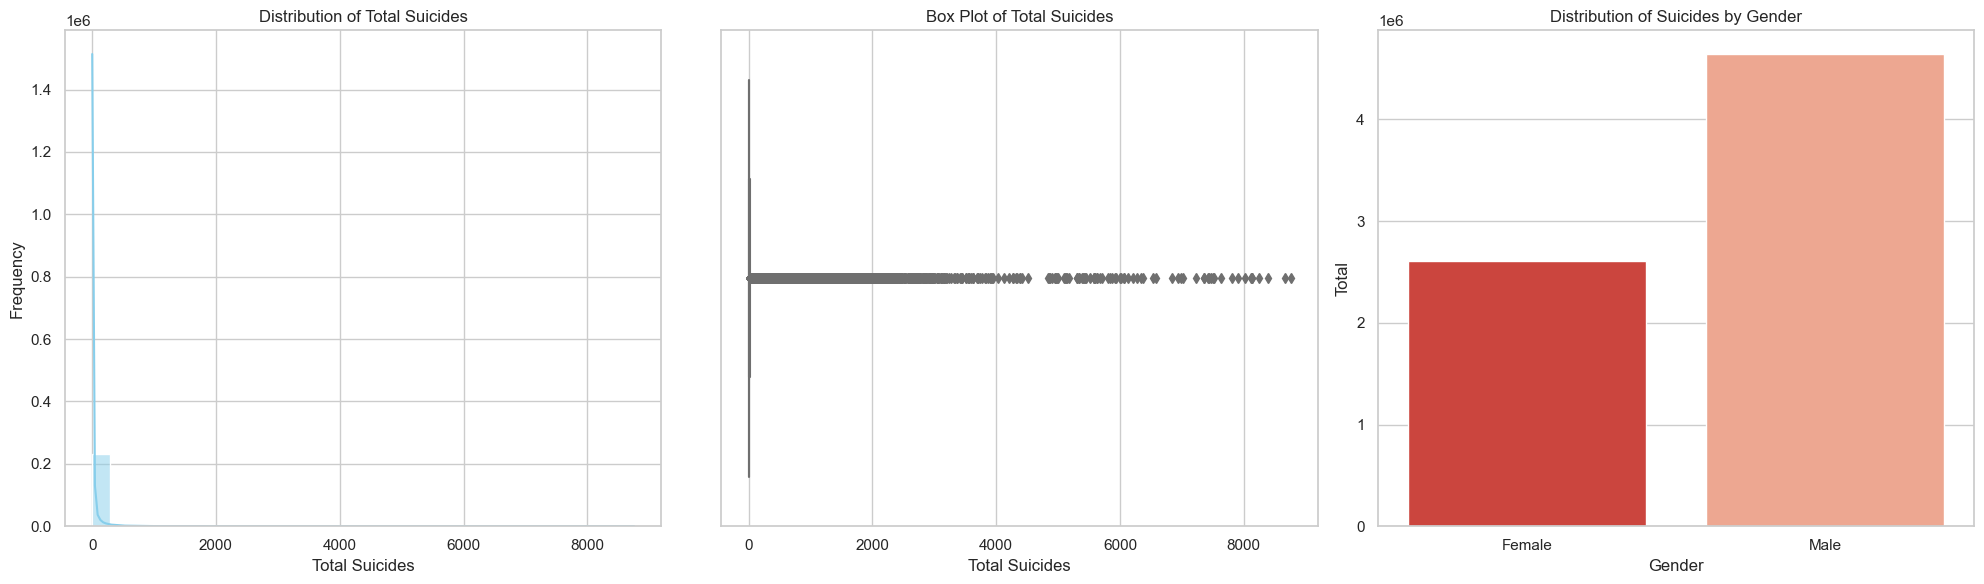

In [17]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Histogram of the "Total" variable
sns.histplot(df['Total'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Total Suicides')
axes[0].set_xlabel('Total Suicides')
axes[0].set_ylabel('Frequency')

# Box plot of the "Total" variable
sns.boxplot(x=df['Total'], color='skyblue', ax=axes[1])
axes[1].set_title('Box Plot of Total Suicides')
axes[1].set_xlabel('Total Suicides')

# Bar plot for the distribution of suicides by gender
filter_gender = df.groupby('Gender', as_index=False).sum()[['Gender', 'Total']]
c1 = sns.barplot(x='Gender', y='Total', data=filter_gender, palette='Reds_r', ax=axes[2])
axes[2].set_title('Distribution of Suicides by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Total')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

*Gender wise Suicide on the basis of Mental Illness:*

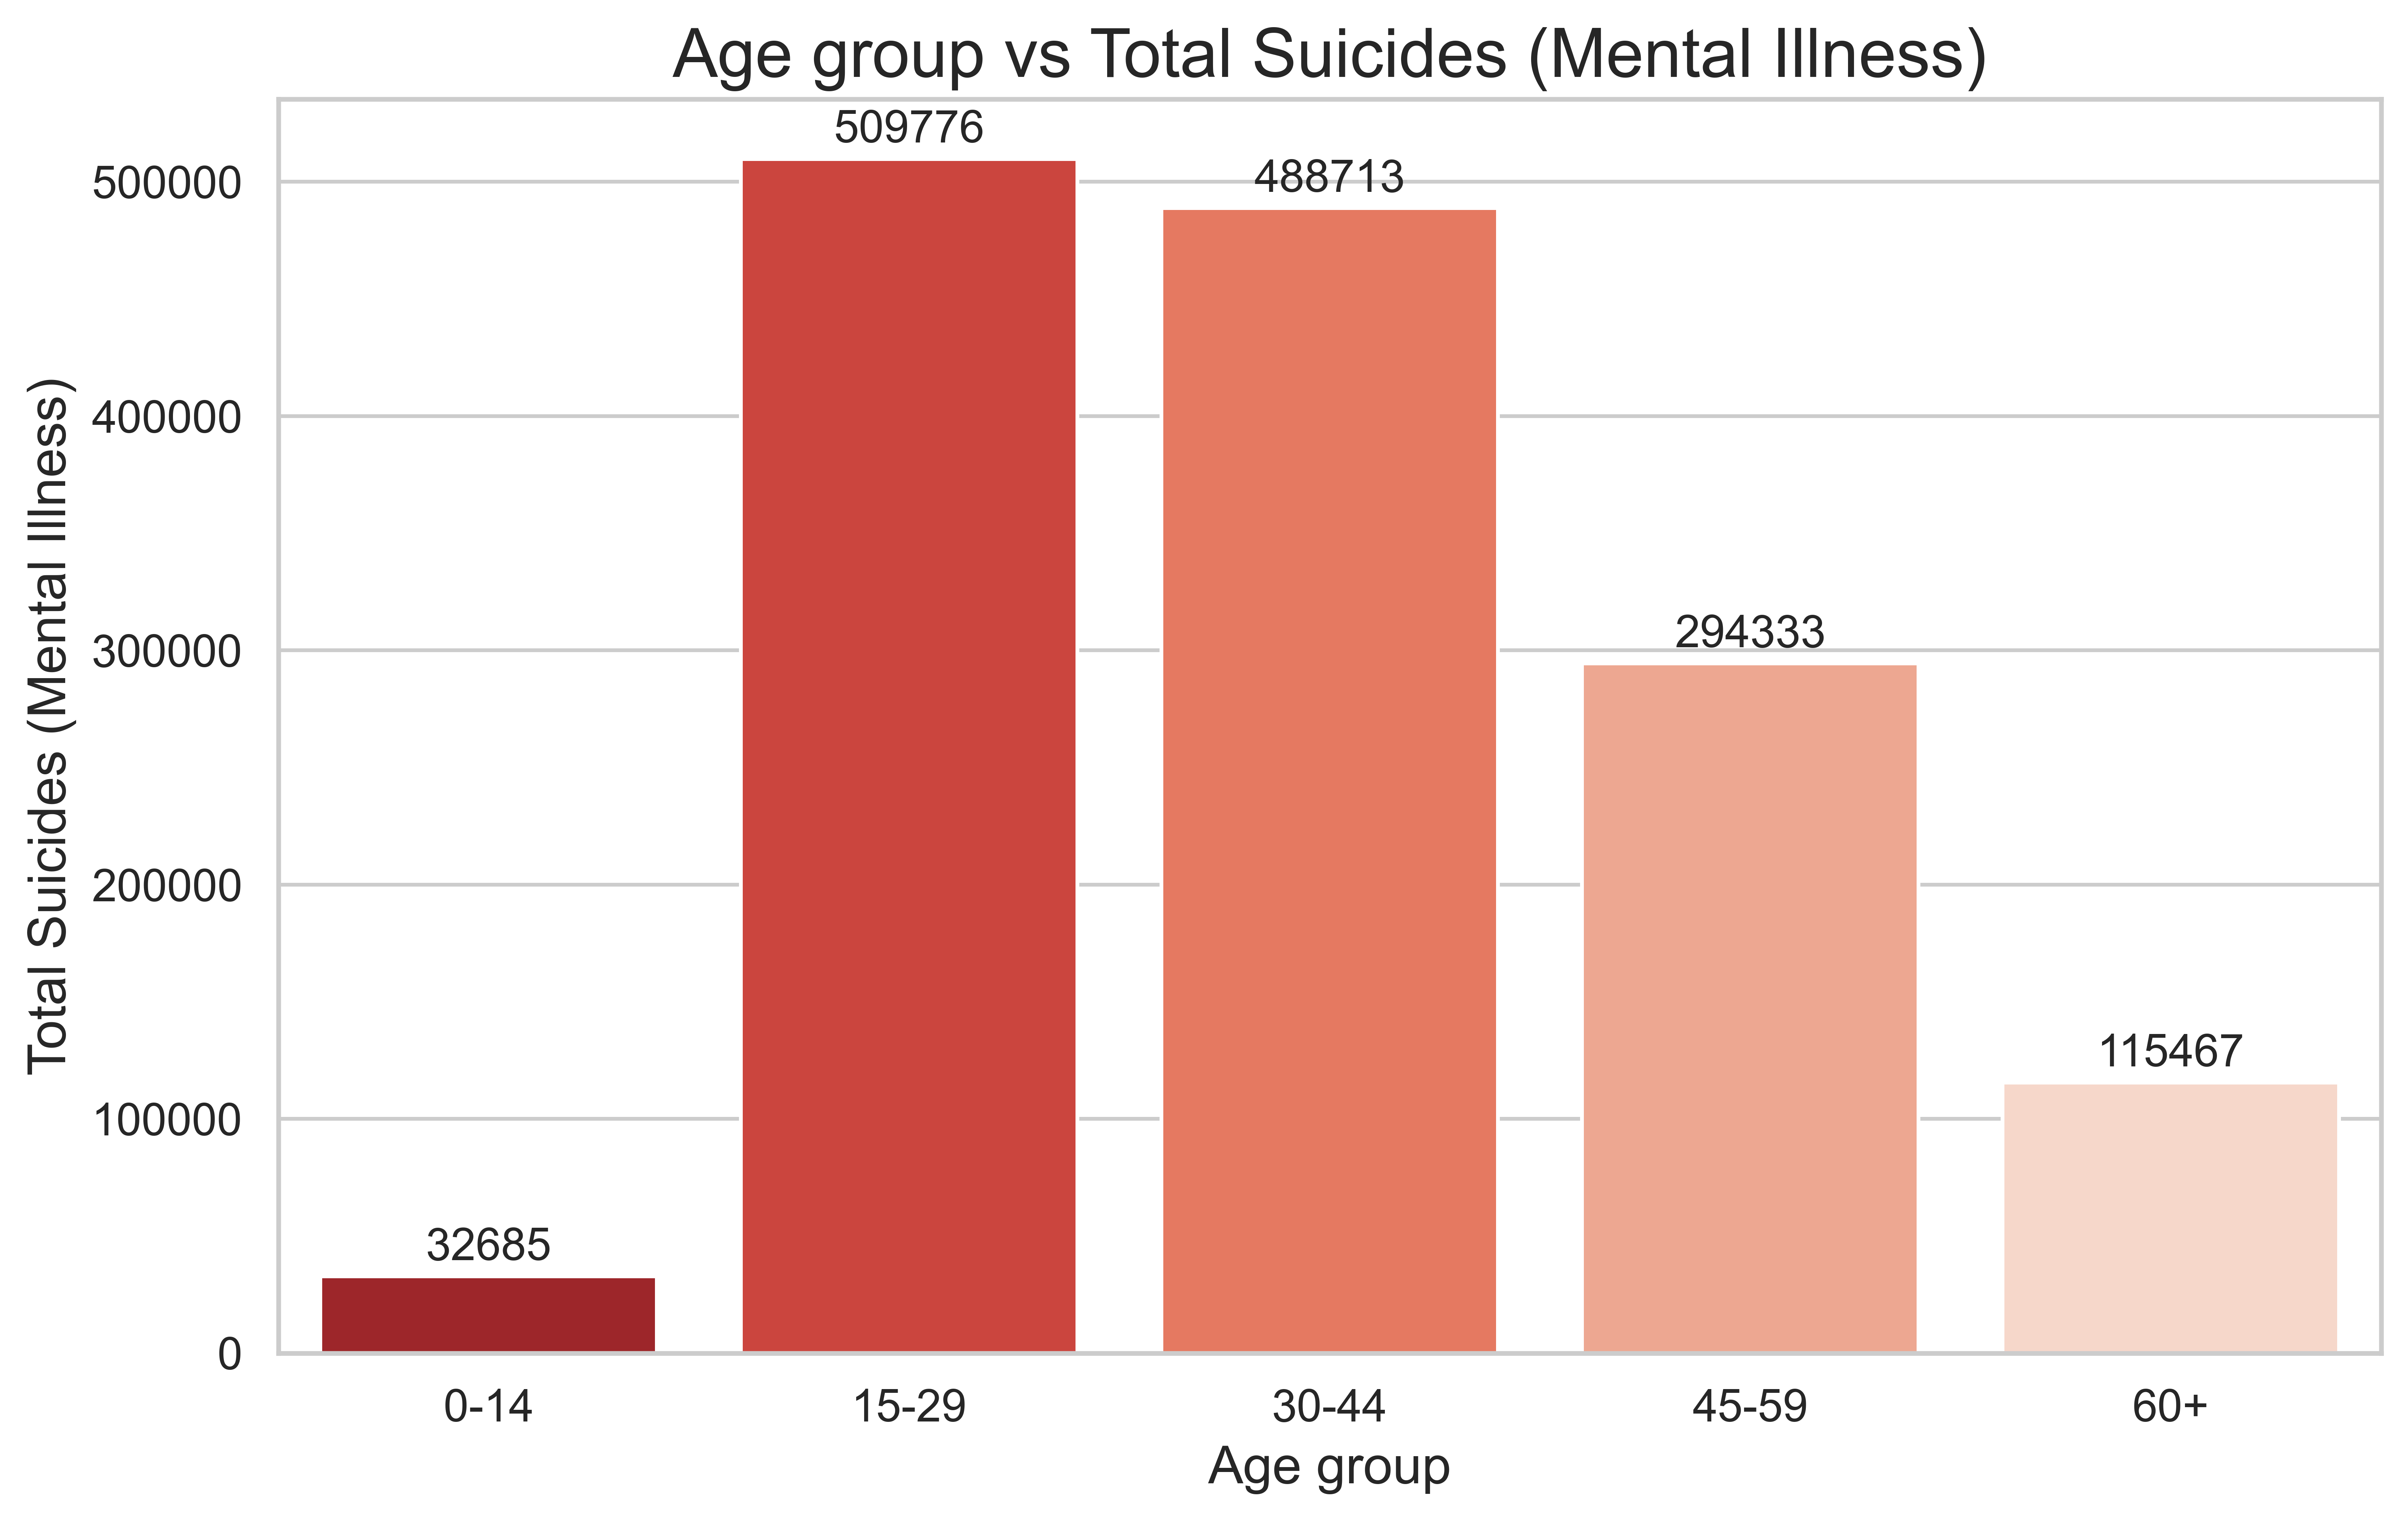

In [18]:
temp = df_causes[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6), dpi=720)
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],padding=2, size=12)
plt.title('Age group vs Total Suicides (Mental Illness)',fontsize=18)
plt.xlabel('Age group', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Total Suicides (Mental Illness)', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

## Bivariate Analysis


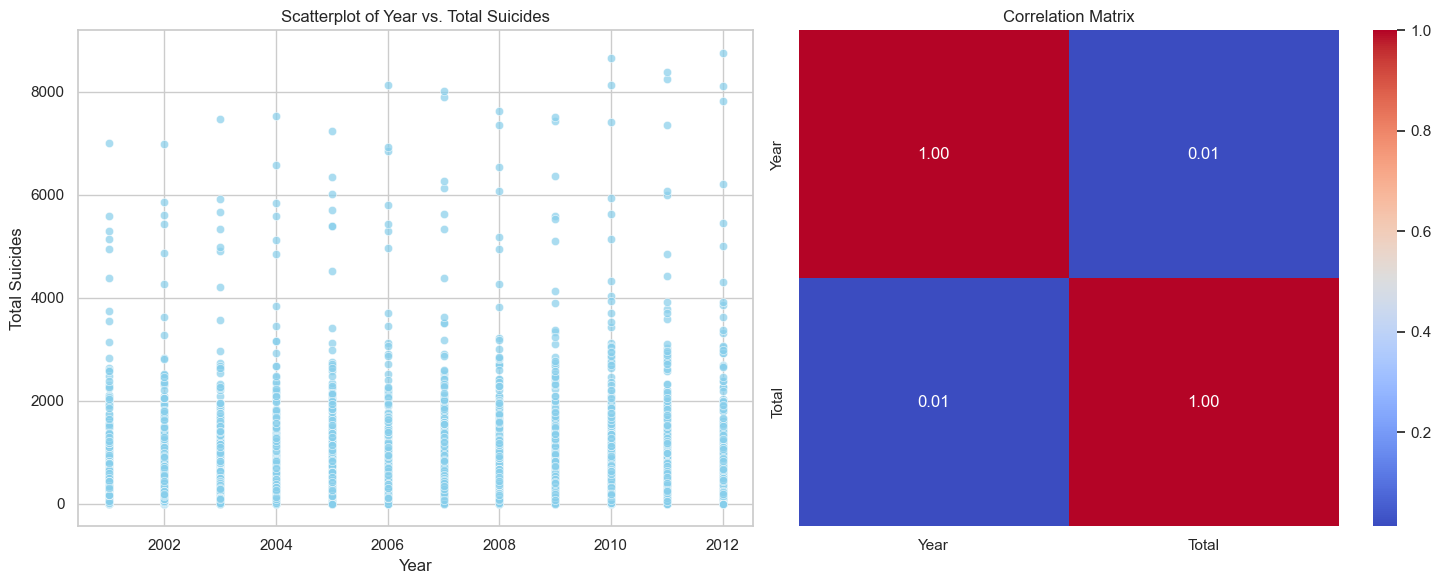

In [19]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatterplot of "Year" vs. "Total"
sns.scatterplot(x='Year', y='Total', data=df, alpha=0.7, color='skyblue', ax=axes[0])
axes[0].set_title('Scatterplot of Year vs. Total Suicides')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Suicides')

# Correlation matrix
correlation_matrix = df[['Year', 'Total']].corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


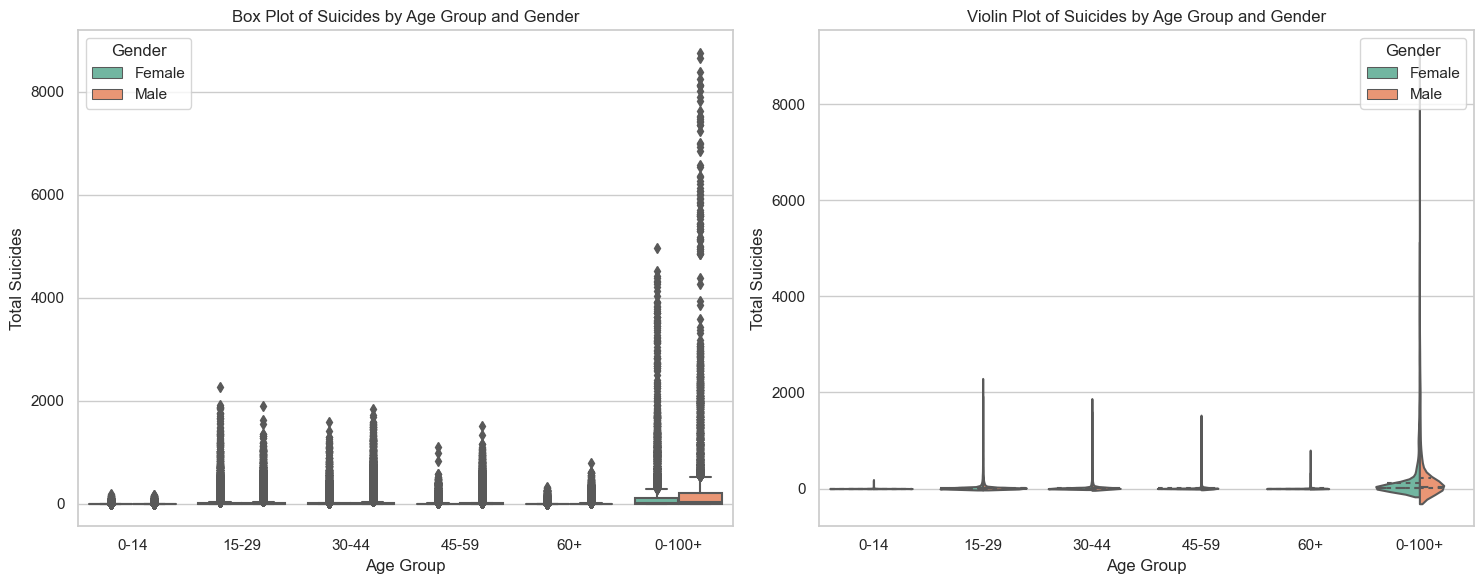

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Box plot of "Age_group" vs. "Total" for different genders
sns.boxplot(x='Age_group', y='Total', data=df, hue='Gender', palette='Set2', ax=axes[0])
axes[0].set_title('Box Plot of Suicides by Age Group and Gender')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Total Suicides')

# Violin plot of "Age_group" vs. "Total" for different genders
sns.violinplot(x='Age_group', y='Total', data=df, hue='Gender', split=True, inner='quart', palette='Set2', ax=axes[1])
axes[1].set_title('Violin Plot of Suicides by Age Group and Gender')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Suicides')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Multivariate Analysis

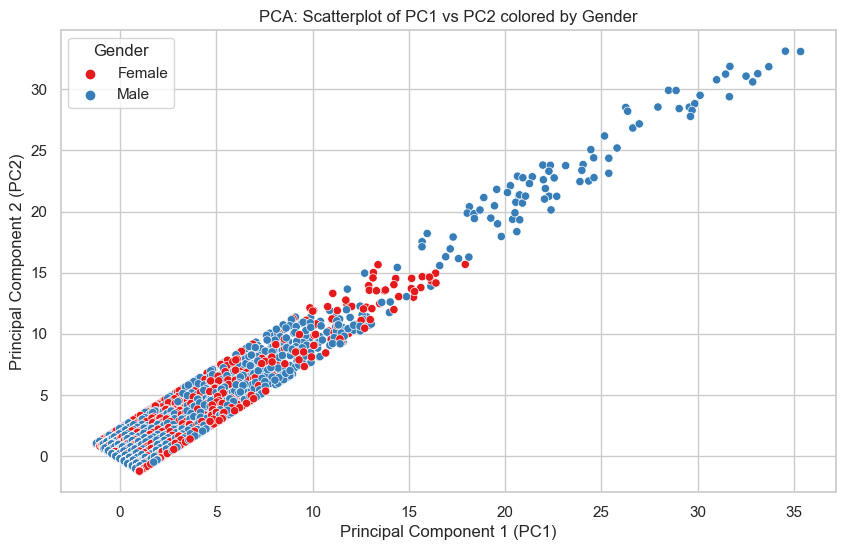

In [21]:
# Assuming your DataFrame is named 'df'
# Replace 'your_dataset.csv' with the actual file name or path to your dataset
# df = pd.read_csv('your_dataset.csv')

# Extract numerical features for PCA
numerical_features = df.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize the numerical features
scaled_features = StandardScaler().fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Combine with categorical features
final_df = pd.concat([pc_df, df[['Gender', 'Age_group']]], axis=1)

# Scatterplot of PCA components colored by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=final_df, palette='Set1')
plt.title('PCA: Scatterplot of PC1 vs PC2 colored by Gender')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


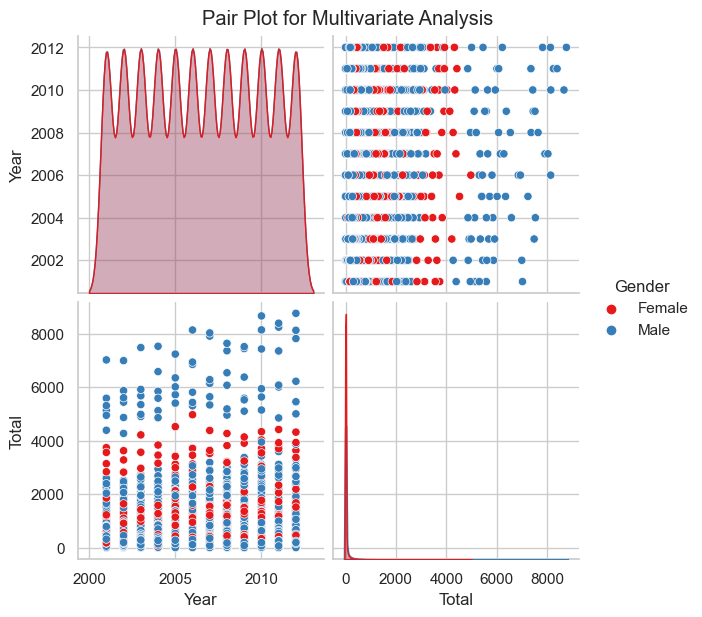

In [22]:
# Create a pair plot with hue for different genders
sns.pairplot(df, hue='Gender', diag_kind='kde', palette='Set1', height=3)
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02)
plt.show()

## Distributions

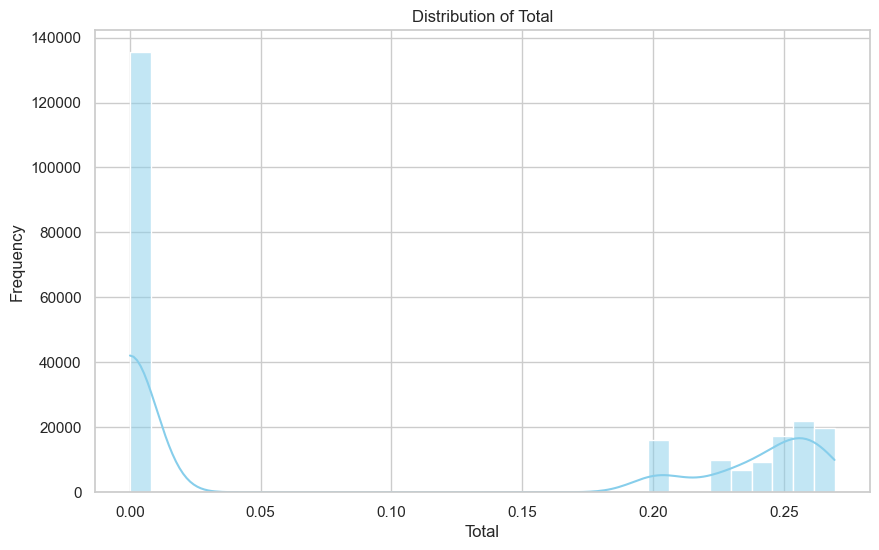

In [33]:
# Choose the variable you want to analyze (e.g., 'Total' in this case)
variable_to_transform = 'Total'

# Plot the current distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[variable_to_transform], kde=True, color='skyblue')
plt.title(f'Distribution of {variable_to_transform}')
plt.xlabel(variable_to_transform)
plt.ylabel('Frequency')
plt.show()

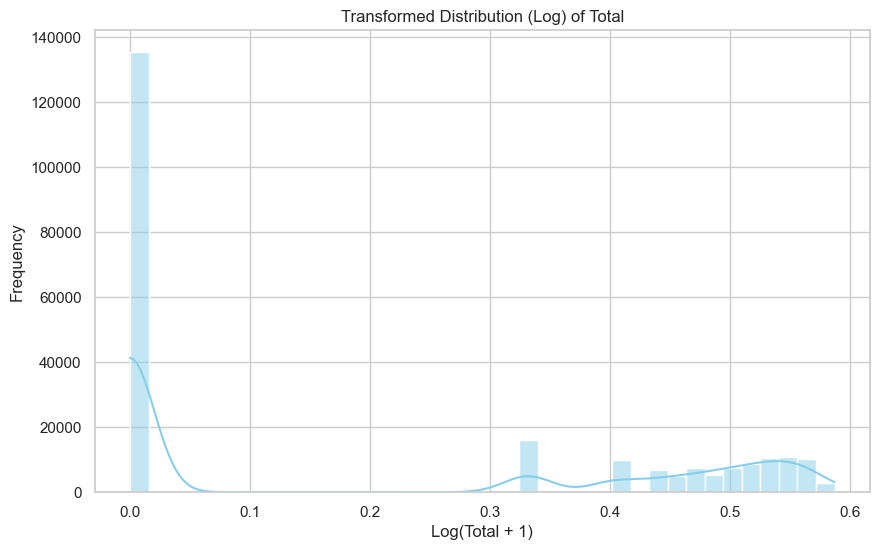

In [31]:
# Add a small constant to handle zero values (if any)
df[variable_to_transform] = np.log1p(df[variable_to_transform])

# Visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[variable_to_transform], kde=True, color='skyblue')
plt.title(f'Transformed Distribution (Log) of {variable_to_transform}')
plt.xlabel(f'Log({variable_to_transform} + 1)')
plt.ylabel('Frequency')
plt.show()

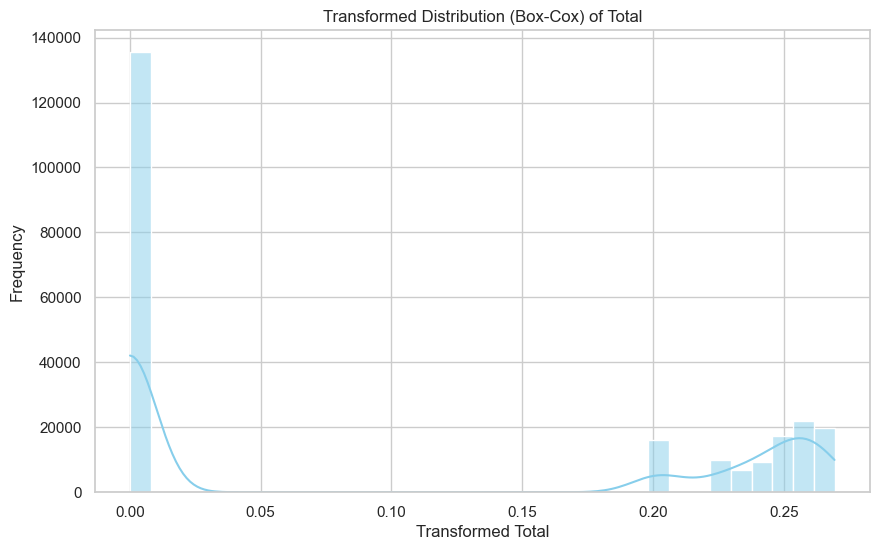

In [32]:
# Perform Box-Cox transformation
df[variable_to_transform], _ = boxcox(df[variable_to_transform] + 1)

# Visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[variable_to_transform], kde=True, color='skyblue')
plt.title(f'Transformed Distribution (Box-Cox) of {variable_to_transform}')
plt.xlabel(f'Transformed {variable_to_transform}')
plt.ylabel('Frequency')
plt.show()


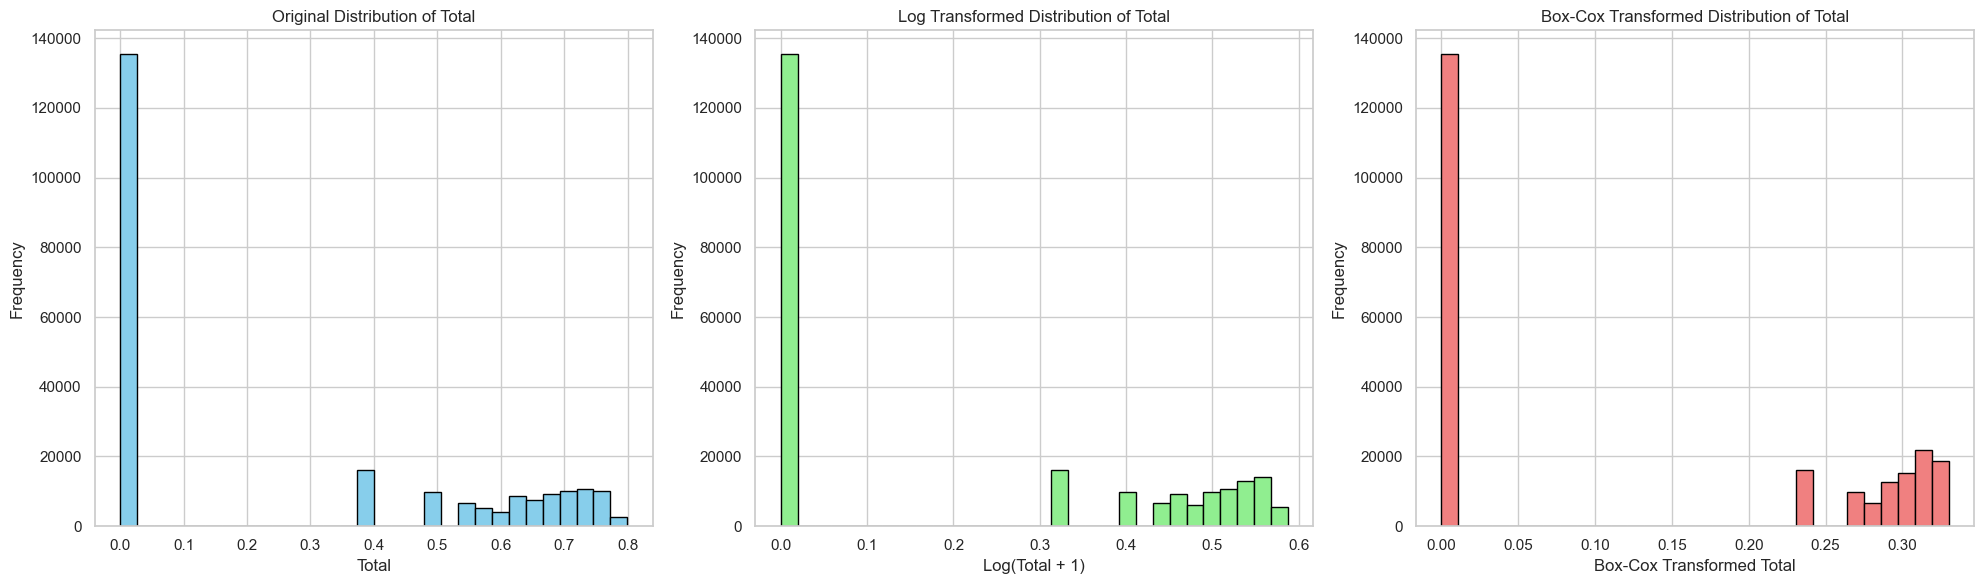

In [30]:
# Choose the variable you want to analyze (e.g., 'Total' in this case)
variable_to_transform = 'Total'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Original Distribution
axes[0].hist(df[variable_to_transform], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title(f'Original Distribution of {variable_to_transform}')
axes[0].set_xlabel(variable_to_transform)
axes[0].set_ylabel('Frequency')

# Log Transformation
df['Log_Transformed'] = np.log1p(df[variable_to_transform])
axes[1].hist(df['Log_Transformed'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title(f'Log Transformed Distribution of {variable_to_transform}')
axes[1].set_xlabel(f'Log({variable_to_transform} + 1)')
axes[1].set_ylabel('Frequency')

# Box-Cox Transformation
df['BoxCox_Transformed'], _ = boxcox(df[variable_to_transform] + 1)
axes[2].hist(df['BoxCox_Transformed'], bins=30, color='lightcoral', edgecolor='black')
axes[2].set_title(f'Box-Cox Transformed Distribution of {variable_to_transform}')
axes[2].set_xlabel(f'Box-Cox Transformed {variable_to_transform}')
axes[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## Hypothesis Testing

In [28]:
# Perform one-way ANOVA
result = stats.f_oneway(df['Total'][df['Age_group'] == '0-14'],
                         df['Total'][df['Age_group'] == '15-29'],
                         df['Total'][df['Age_group'] == '30-44'],
                         df['Total'][df['Age_group'] == '45-59'],
                         df['Total'][df['Age_group'] == '60+'])

# Display the results
print("ANOVA p-value:", result.pvalue)

# Interpret the results
alpha = 0.05 # Set the significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in total suicides between age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in total suicides between age groups.")


ANOVA p-value: 0.0
Reject the null hypothesis. There is a significant difference in total suicides between age groups.
